# BOW기반의 문서 분류
* 문서 분류는 주어진 문서에 대해 미리 정의된 클래스로 분류하는 작업을 말한다.
* 문서분류의 예
    * 메일의 내용을 분석해 스팸 메일의 여부를 결정하는 것
    * 문서의 내용이 호의적인지 비호의적인지 알아내는 것 등등
    
<br>
    
* 이번장에서는 문서분류에 있어서 Benchmark Dataset인 20 newsgroups dataset을 사용할 것이다. (이 데이터를 사용하여 새로운 텍스트 마이닝 기법이 개발 됐을때, 그 기법의 성능을 평가하는 기준으로 많이 사용된다.

* sklearn에서 20개의 토픽에 속한 18000여개의 문서를 다운받을 수 있도록 지원한다.
    * `sklearn.datasets.fetch_20newsgroups`
    
* 사이킷런에서는 학습 데이터셋과 평가 데이터셋이 미리 분리돼 있어서 서로 다른 기법의 성능을 공정하게 비교할 수 있다.

* 이외에도 사이킷런의 20 뉴스그룹 데이터는 다음과 같은 특징을 갖고 있다.
    * `categories`: 매개변수를 이용해 20개의 topic중에서 원하는 토픽을 선택할 수 있다.
    * `remove`: remove로 필요없는 데이터를 삭제할 수 있다.
    * `.data`를 이용해서 텍스트의 내용을, `.target`은 **숫자로 표시된 라벨**을 가져오는데 사용딘다.
    
* 여기서는 topic을 4개만 선택해 수행하고자 한다.
    * 이때, 문서안에서 header나 footers, quotes에 종종 토픽 이름이 쓰여져 있는 경우가 있어 힌트를 배제하기 위해서 remove로 제거했다.

In [1]:
from sklearn.datasets import fetch_20newsgroups

# 20개의 토픽중 사용하고자 하는 토픽을 리스트로 생성
categories = ['alt.atheism','talk.religion.misc','comp.graphics','sci.space']

# 학습 데이터셋을 가져온다.
newsgroups_train = fetch_20newsgroups(subset = 'train',
                                     remove = ('headers','footers','quotes'),
                                     categories = categories)
newsgroups_test = fetch_20newsgroups(subset = 'test',
                                    remove = ('headers','footers','quotes'),
                                    categories = categories)
print(len(newsgroups_train.data))
print(len(newsgroups_test.data))
print(newsgroups_train.target_names)
print(set(newsgroups_train.target))

2034
1353
['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
{0, 1, 2, 3}


* `newsgroups_train.target_names`에는 토픽의 값이 들어있는데 여기에 있는 순서에 따라 `.target`의 순서가 정해진다.

In [2]:
print("train set text samples:", newsgroups_train.data[0])
print("train set label samples:", newsgroups_train.target[0])
print("test set text samples:", newsgroups_test.data[0])
print("test set label sampples:", newsgroups_test.target[0])

train set text samples: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
train set label samples: 1
test set text samples: TRry the SKywatch project in  Arizona.
test set label sampples: 2


* 위의 얘기를 토대로 확인해볼때 train_data의 첫번째 text 데이터는 label이 1번인덱스를 갖는 `comp.graphics`임을 알 수 있고
* test_data의 첫번째 text 데이터는 label이 2번 인덱스르 갖는 `sci.space`임을 알 수 있다.

In [3]:
X_train = newsgroups_train.data # 학습 데이터셋 문서
y_train = newsgroups_train.target # 학습 데이터셋 라벨

X_test = newsgroups_test.data # 평가 데이터셋 문서
y_test = newsgroups_test.target # 평가 데이터셋 라벨

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000,min_df = 5, max_df = 0.5)
X_train_cv = cv.fit_transform(X_train) # X_train을 Count Vector화 한다.
print("train shape", X_train_cv.shape)
X_test_cv = cv.transform(X_test)
print("test shape",X_test_cv.shape)

train shape (2034, 2000)
test shape (1353, 2000)


In [4]:
# train data에 대해서 대략 어떤 단어가 얼마나 들엇는지 확인
for word, count in zip(cv.get_feature_names_out()[:100], X_train_cv.toarray()[0,:100]): 
    print(word,':',count,end = ', ')

00 : 0, 000 : 0, 01 : 0, 04 : 0, 05 : 0, 10 : 0, 100 : 0, 1000 : 0, 11 : 0, 12 : 0, 128 : 0, 129 : 0, 13 : 0, 130 : 0, 14 : 0, 15 : 0, 16 : 0, 17 : 0, 18 : 0, 19 : 0, 1987 : 0, 1988 : 0, 1989 : 0, 1990 : 0, 1991 : 0, 1992 : 0, 1993 : 0, 20 : 0, 200 : 0, 202 : 0, 21 : 0, 22 : 0, 23 : 0, 24 : 0, 25 : 0, 256 : 0, 26 : 0, 27 : 0, 28 : 0, 2d : 0, 30 : 0, 300 : 0, 31 : 0, 32 : 0, 33 : 0, 34 : 0, 35 : 0, 39 : 0, 3d : 0, 40 : 0, 400 : 0, 42 : 0, 45 : 0, 50 : 0, 500 : 0, 60 : 0, 600 : 0, 65 : 0, 70 : 0, 75 : 0, 80 : 0, 800 : 0, 90 : 0, 900 : 0, 91 : 0, 92 : 0, 93 : 0, 95 : 0, _the : 0, ability : 0, able : 1, abortion : 0, about : 1, above : 0, absolute : 0, absolutely : 0, ac : 0, accept : 0, acceptable : 0, accepted : 0, access : 0, according : 0, account : 0, accurate : 0, across : 0, act : 0, action : 0, actions : 0, active : 0, activities : 0, activity : 0, acts : 0, actual : 0, actually : 0, ad : 0, add : 0, added : 0, addition : 0, additional : 0, address : 0, 

## 머신러닝과 문서분류
* 머신러닝과 문서분류는 다음과 같은 문서분류의 과정을 보여준다
    * 데이터정제, 전처리
    * 데이터 분리
    * 머신러닝 학습
    * 평가
    * 최종모형 도출
    * 예측

* 학습된 모형에 대한 평가는 어떻게 이루어질까?
    * &rightarrow; 성능을 평가하기 위한 지표에는 여러가지가 있지만 가장 많이 사용되는 지표는 정확도이다.

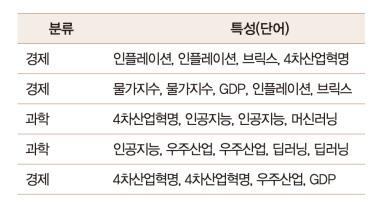

## Naive Bayse분류기를 이용한 문서분류
핵심은 TrainSet에서 알 수 있는 정보는 각 샘플들의 단어의 개수들과 각 Label을 알 수 있고 이를 토대로 어떤 단어가 들어갈때 긍정일 확률을 구할 수 있다.
<br>
$P(긍정|특정 단어) = P(특정단어|긍정)\times P(긍정)\times (1/P(특정단어))$
위와 같은 식조작을 통해서 우리는 특정단어가 들어갈때 긍정일 확률과 부정일 확률등을 구할 수 있다. 이것이 `fit`과정에서 일어나는 계산이고
`predict`에서는 이를 위에서 구한 특정단어가 들어갔을때 긍정일 확률과 부정일 확률을 각각의 단어에 대해서 계산(Sum)을 해서 확률을 구하게 된다.

* `MultinomialNB()`는 이산적인 특성 값들을 이용해 분류를 하고자 할 때 사용한다.
    * 우리의 경우에는 카운트 벡터가 이에 해당한다.
    * **원칙적으로는 MultinomialNB는 이산적인 값(갯수)에 대해 사용하도록 돼있지만, TF-IDF와 같은 연속적인 값에 대해서도 잘 작동한다.**
        * 우리 입장에서는 성능이 가장 중요하기 때문에 둘다 해본후 더 나은 모형을 선택하면 된다.
        * 아래는 MultinomialNB() 객체를 생성한 이후에 학습을 진행한후 학습 데이터셋과 평가 데이터셋에 대해서 정확도를 계산했다.

* `MultinomialNB()`의 주요 파라미터
    * `.score()` 클래스 메소드: 이를 이용해서 앞서 설명한 정확도를 반환한다.
    * `fit()`: 앞에서 설명한 과정을 통해 모델을 fit 시킨다.
    * `predict()`: predict메소드를 이용해서 특성을 주게 되면 그 특성에 해당하는 라벨을 반환한다. 이때, 실제 카테고리를 알고 싶다면 `newsgroups_train.target_names`를 출력한다.

In [5]:
from sklearn.naive_bayes import MultinomialNB # sklearn이 제공하는 MultinomialNB 를 사용
NB_clf = MultinomialNB() # 분류기 선언

NB_clf.fit(X_train_cv, y_train) # train set을 이용하여 분류기(classifier)를 학습

print('Train set score: {:.3f}'.format(NB_clf.score(X_train_cv, y_train))) # train set에 대한 예측정확도를 확인
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_cv, y_test))) # test set에 대한 예측정확도를 확인

Train set score: 0.824
Test set score: 0.732


In [6]:
print('#First document and label in test data:', X_test[0], y_test[0])
print('#Second document and label in test data:', X_test[1], y_test[1])
print('#Third document and label in test data:', X_test[2], y_test[2])

pred = NB_clf.predict(X_test_cv[:3])

print('#Predicted labels:', pred)
print('#Predicted categories:',
      newsgroups_train.target_names[pred[0]],
      newsgroups_train.target_names[pred[1]],
      newsgroups_train.target_names[pred[2]])

#First document and label in test data: TRry the SKywatch project in  Arizona. 2
#Second document and label in test data: The Vatican library recently made a tour of the US.
 Can anyone help me in finding a FTP site where this collection is 
 available. 1
#Third document and label in test data: Hi there,

I am here looking for some help.

My friend is a interior decor designer. He is from Thailand. He is
trying to find some graphics software on PC. Any suggestion on which
software to buy,where to buy and how much it costs ? He likes the most
sophisticated 
software(the more features it has,the better) 1
#Predicted labels: [2 1 1]
#Predicted categories: sci.space comp.graphics comp.graphics


In [7]:
newsgroups_test.target_names # newsgroups_train과 .target_names가 동일하다.

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

cv_tfid = TfidfVectorizer(max_features = 2000,min_df = 5, max_df = 0.5)

# sparse matrix를 그대로 받아들이는 것을 볼 수 있다.
train_cv_tfid_matrix = cv_tfid.fit_transform(X_train)
test_cv_tfid_matrix = cv_tfid.transform(X_test)

naive_clf = MultinomialNB()
naive_clf.fit(train_cv_tfid_matrix,y_train)
print('Train set score:{0:7.3f}'.format(naive_clf.score(train_cv_tfid_matrix,y_train)))
print('Test set score:{0:7.3f}'.format(naive_clf.score(test_cv_tfid_matrix, y_test))) # test set에 대한 예측정확도를 확인

Train set score:  0.862
Test set score:  0.741


In [11]:
naive_clf.coef_.shape # 4개의 Target에 대해서 각 단어집합에 대한 계수가 Fit돼있다.

(4, 2000)

In [12]:
def top10_features(classifier, vectorizer, categories):
    # 단어집합을 array로 만들어놓음
    feature_names = np.array(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        # 역순으로 정렬하기 위해 계수에 음수를 취해서 정렬 후 앞에서부터 10개의 값을 반환
        # categories와 naive classifier에서는 각각의 count vector의 feature들의 계수
        top10 = np.argsort(-classifier.coef_[i])[:10] # 내림차순 정렬 해서 상위 10개 뽑음
        # 카테고리에 영향이 큰 특성 10개를 출력
        print("{0}: {1}".format(category, ", ".join(feature_names[top10])))
top10_features(naive_clf,cv_tfid,newsgroups_train.target_names) 

alt.atheism: you, not, are, be, this, have, as, what, they, if
comp.graphics: you, on, graphics, this, have, any, can, or, with, thanks
sci.space: space, on, you, be, was, this, as, they, have, are
talk.religion.misc: you, not, he, are, as, this, be, god, was, they


In [13]:
set(newsgroups_train.target)

{0, 1, 2, 3}

In [14]:
print(len(naive_clf.coef_))
print(len(naive_clf.coef_[0])) 
# categories와 naive classifier에서는 각각의 count vector의 feature들의 계수
# 즉 특정단어가 들어갔을때 label일 확률을 모아둔 것


4
2000
